In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, classification_report

In [2]:
df = pd.read_csv("../metrics/cnn_bert/cnn_bert_05_20_14_01_35/test_result.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24038 entries, 0 to 24037
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   pred    24038 non-null  int64
 1   target  24038 non-null  int64
dtypes: int64(2)
memory usage: 375.7 KB


In [4]:
confusion_matrix(df['target'], df['pred'])

array([[4552,    4,    0,  110,  104,    2],
       [   4, 4379,  338,    8,    4,   38],
       [   1,    2, 3452,    0,    0,    0],
       [   6,    9,    1, 4735,   20,    0],
       [   3,    1,    0,  219, 4154,  395],
       [   0,    2,    0,    1,    0, 1494]])

In [5]:
accuracy_score(df['target'], df['pred'])

0.947083784008653

In [6]:
f1_score(df['target'], df['pred'], average="weighted")

0.947506050374175

<Axes: >

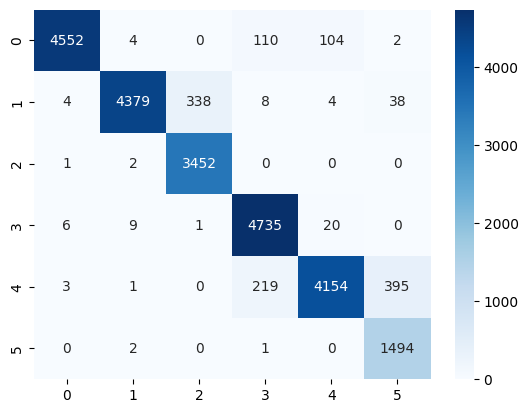

In [8]:
sns.heatmap(confusion_matrix(df['target'], df['pred']), annot=True, 
           fmt='d',  cmap='Blues')

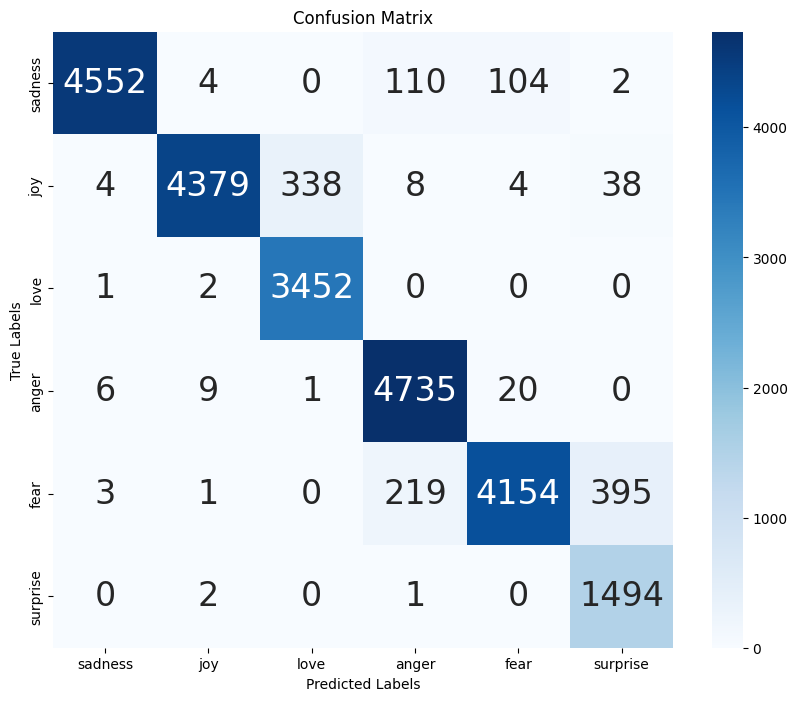

In [12]:
# Define the label names
label_names = {
    "sadness": 0,
    "joy": 1,
    "love": 2,
    "anger": 3,
    "fear": 4,
    "surprise": 5
}

# Create a reverse mapping from integer to label names
int_to_label = {v: k for k, v in label_names.items()}

# Generate the confusion matrix
cm = confusion_matrix(df['target'], df['pred'])

# Create a list of label names in the correct order
labels = [int_to_label[i] for i in range(len(label_names))]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, annot_kws={"fontsize":24})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [39]:
list(label_names.keys())

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [57]:
print(classification_report(df['target'], df['pred'], target_names=list(label_names.keys())))

              precision    recall  f1-score   support

     sadness       1.00      0.95      0.97      4772
         joy       1.00      0.92      0.96      4771
        love       0.91      1.00      0.95      3455
       anger       0.93      0.99      0.96      4771
        fear       0.97      0.87      0.92      4772
    surprise       0.77      1.00      0.87      1497

    accuracy                           0.95     24038
   macro avg       0.93      0.96      0.94     24038
weighted avg       0.95      0.95      0.95     24038



In [ ]:
=IFS(
  O2>=93, "A",
  O2>=90, "A-",
  O2>=87, "B+",
  O2>=83, "B",
  O2>=80, "B-",
  O2>=77, "C+",
  O2>=73, "C",
  O2>=70, "C-",
  O2>=67, "D+",
  O2>=63, "D",
  O2>=60, "D-",
  O2<60, "F"
)


In [13]:
df_1 = pd.read_csv("../metrics/base_bert/base_bert_05_20_00_09_15/test_result.csv")

In [14]:
accuracy_score(df_1['target'], df_1['pred'])

0.9459189616440635

In [44]:
f1_score(df_1['target'], df_1['pred'], average="weighted")

0.9454254016222952

In [26]:
roc_auc_score(df_1['target'], df_1['pred'], average="micro")

ValueError: multi_class must be in ('ovo', 'ovr')